In [ ]:
"""
This is the data cleaning and processing script for Gab posts. 

The input is the raw text files 


"""

#write_content_to_file('data/raw/gab_nvidia_outputs/raw/', 20, 'data/raw/gab_nvidia_outputs/raw/combined.txt')
sentiments,counts = pos_neg_neutr_count('data/raw/gab_nvidia_outputs/raw/', 20)
print(counts)
# {-1: 109, 0: 171, 1: 216}

def plot_sentiments(counts):
    import matplotlib.pyplot as plt
    #s = sum(counts.values())
    #print(s)
    percents = [x/sum(counts.values()) for x in list(counts.values())]
                #list(counts.values())/sum(counts.values())
    plt.bar(counts.keys(), percents, color = ['red', 'green', 'blue'])
    plt.xticks([-1,0,1])
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis of Gab Posts Mentioning Nvidia or NVDA')
    plt.savefig('data/raw/gab_nvidia_outputs/outputs/sentiment_analysis.png')
    plt.show()
plot_sentiments(counts)

In [3]:
import json
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srivatsakundurthy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Extract Text Fields from Raw JSON

In [5]:

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    return json_data

# Example usage
#file_path = 'data/raw/gab_nvidia_outputs/raw/output1.txt'
#json_object = read_json_file(file_path)

def extract_content(jobject):
    out = ''
    status_list = jobject['statuses']
    for status in status_list:
        out += status['content']
        out += '\n'
    return out

def write_content_to_file(file_dir,num,write_path):
    for i in range(1,num+1):
        file_path = file_dir + 'output' + str(i) + '.txt'
        json_object = read_json_file(file_path)
        with open(write_path, 'a') as file:
            # manana principle
            content = extract_content(json_object)
            file.write(content)
            file.write('\n')


In [6]:
write_content_to_file('../data/raw/Gab/',20,'../data/demo_generations/gab_nvidia_text.txt')

# Sentiment Analysis

In [7]:
def text_sentiment_aux(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)
    comp_score = score['compound']
    print(comp_score)
    if comp_score > 0.05:
        return 1
    elif comp_score < -0.05:
        return -1
    else:
        return 0

def extract_individual_posts(jobject):
    out = []
    status_list = jobject['statuses']
    for status in status_list:
        out.append(status['content'])
    return out

def extract_sentiments(jobject):
    out = [] 
    status_list = jobject['statuses']
    for status in status_list:
        out.append(text_sentiment_aux(status['content']))
    return out

def pos_neg_neutr_count(file_dir,num):
    sentiments = []
    for i in range(1,num+1):
        file_path = file_dir + 'output' + str(i) + '.txt'
        json_object = read_json_file(file_path)
        file_sentiments = extract_sentiments(json_object)
        sentiments.extend(file_sentiments)
    return sentiments, dict(zip([-1,0,1],[sentiments.count(-1),sentiments.count(0),sentiments.count(1)]))

In [9]:
sentiments,counts = pos_neg_neutr_count('../data/raw/Gab/', 20)
print(counts)

0.0018
0.465
0.0
0.8126
0.4404
-0.7476
0.9448
0.0516
-0.1857
0.296
0.8847
-0.7783
0.4098
-0.9886
-0.8199
-0.4215
-0.8316
-0.0258
-0.8929
0.6808
0.5267
0.7351
-0.6249
0.6597
-0.9432
0.3818
0.8298
0.5255
0.0
0.9062
0.7213
0.5574
-0.1027
0.0
0.9201
-0.4939
-0.3612
0.0
-0.3612
-0.25
-0.3612
-0.3612
-0.3612
-0.3612
-0.4137
-0.3599
0.0
0.798
0.0
0.8275
0.0
-0.7024
0.8856
0.2168
0.0
-0.315
0.1527
0.2421
0.0
0.0
0.0
0.6553
-0.9907
0.0
-0.8166
-0.2168
-0.5719
0.4605
0.5514
-0.5256
0.4019
-0.504
0.5267
0.0
0.7319
0.0
-0.34
0.8253
0.0
0.264
-0.4871
0.5994
0.0
0.0
0.4215
0.9237
0.8689
0.0
0.0
-0.9276
-0.9672
-0.4696
0.7227
-0.4939
0.5046
-0.2064
0.8823
-0.0943
-0.2406
-0.1027
0.0
0.9966
0.9308
0.0
0.8998
-0.1531
-0.8402
0.0
0.2023
0.128
0.2732
0.5994
0.0
0.0
0.9571
0.0
0.3313
0.0
0.0
0.0
0.0
-0.6731
0.5994
-0.9138
0.0
0.0
0.0
-0.3939
0.0
0.0
0.5562
-0.168
0.0
0.0
0.0
0.2732
0.91
0.0
0.0
0.0
0.0
0.0
0.4767
0.8624
0.594
-0.128
0.0
0.8624
-0.0609
0.0
0.9411
0.6187
0.2168
0.0
0.0
0.5514
0.5514
0.4939


# Plot Sentiment

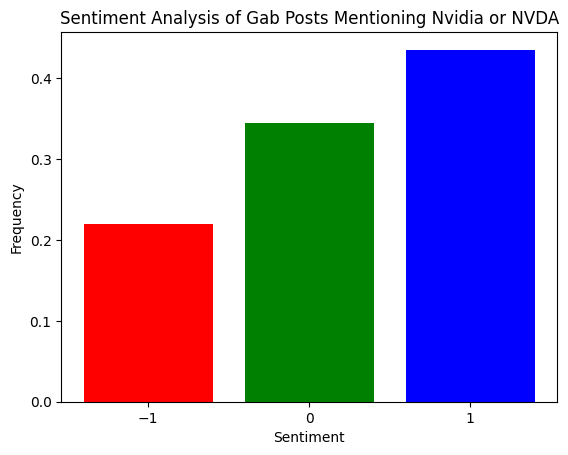

In [10]:
def plot_sentiments(counts):
    import matplotlib.pyplot as plt
    #s = sum(counts.values())
    #print(s)
    percents = [x/sum(counts.values()) for x in list(counts.values())]
                #list(counts.values())/sum(counts.values())
    plt.bar(counts.keys(), percents, color = ['red', 'green', 'blue'])
    plt.xticks([-1,0,1])
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis of Gab Posts Mentioning Nvidia or NVDA')
    plt.savefig('../visualizations/demo_generations/gab_sentiment_analysis.png')
    plt.show()
plot_sentiments(counts)